<a href="https://colab.research.google.com/github/Nandani-Rejoice/mcp-gmail/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [ ]:
pip install opencv-contrib-python

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# cv2.imread(path_to_image_with_file_extension, flag)
img = cv2.imread("mandrill.jpg", 1)

In [ ]:
print(img.shape)

(224, 225, 3)


In [ ]:
h, w, c = img.shape
print(f"Dimensions of the image is:\nHeight:", h, ", pixelsnWidth:", w, ", pixelsnNumber of Channels:", c)

Dimensions of the image is:
Height: 224 , pixelsnWidth: 225 , pixelsnNumber of Channels: 3


In [ ]:
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
print(img.dtype)

uint8


In [ ]:
print(img)

[[[173 209 217]
  [124 160 168]
  [139 175 183]
  ...
  [132 168 162]
  [166 200 194]
  [225 255 252]]

 [[142 178 185]
  [ 33  69  77]
  [ 27  63  71]
  ...
  [ 61  97  91]
  [ 81 115 109]
  [204 236 231]]

 [[133 169 177]
  [ 46  82  90]
  [ 34  70  78]
  ...
  [ 70 106 100]
  [ 68 102  97]
  [211 243 238]]

 ...

 [[172 169 151]
  [144 141 123]
  [147 144 126]
  ...
  [ 91  93  95]
  [ 77  79  81]
  [236 237 239]]

 [[186 183 165]
  [149 146 128]
  [140 137 119]
  ...
  [ 76  78  80]
  [ 66  67  69]
  [229 230 232]]

 [[255 255 243]
  [240 237 219]
  [249 246 228]
  ...
  [236 237 239]
  [227 229 231]
  [248 250 252]]]


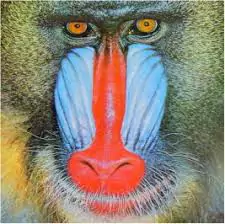

In [ ]:
cv2_imshow(img)
# k = cv2.waitKey(0)

# if k == 27 or k == ord('q'):
#     cv2.destroyAllWindows()


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
cv2.imwrite('Mandrill_grey.jpg', gray)

True

In [ ]:
def extract_bit_plane(cd):
    #  extracting all bit one by one
    # from 1st to 8th in variable
    # from c1 to c8 respectively
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)
    # combining image again to form equivalent to original grayscale image
    cc = 2 * (2 * (2 * c8 + c7) + c6) # reconstructing image  with 3 most significant bit planes
    to_plot = [cd, c1, c2, c3, c4, c5, c6, c7, c8, cc]
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap='gray')
    plt.tight_layout()
    plt.show()
    return cc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

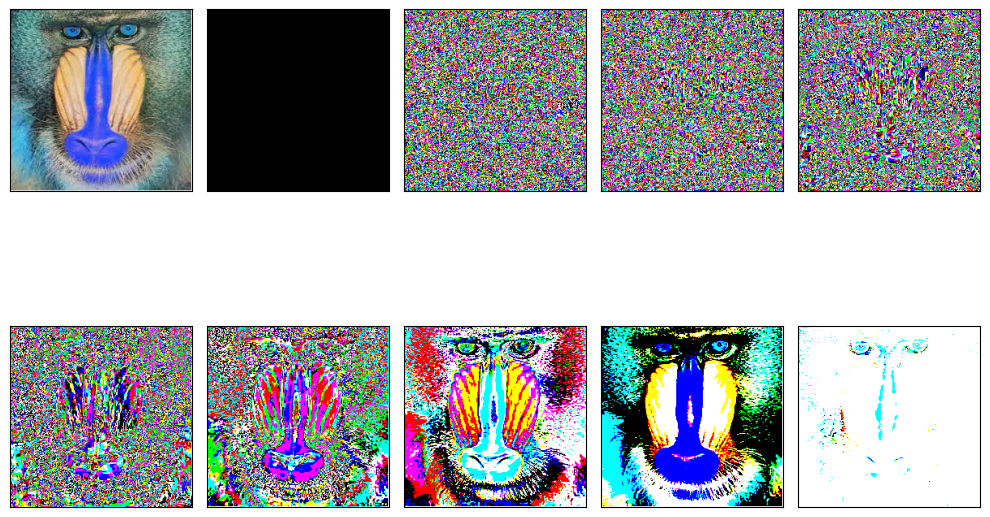

In [ ]:
reconstructed_image = extract_bit_plane(cd=img)

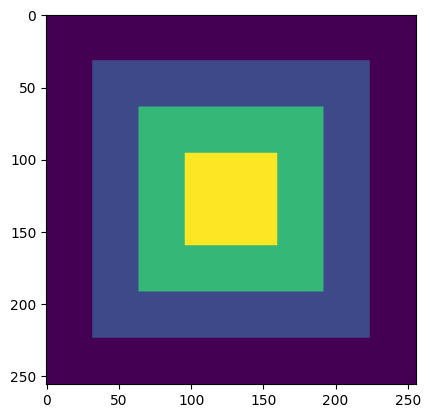

In [ ]:
con_img = np.zeros([256, 256])
con_img[0:32, :] = 40 # upper row
con_img[:, :32] = 40 #left column
con_img[:, 224:256] = 40 # right column
con_img[224:, :] = 40 # lower row
con_img[32:64, 32:224] = 80 # upper row
con_img[64:224, 32:64] = 80 # left column
con_img[64:224, 192:224] = 80 # right column
con_img[192:224, 32:224] = 80 # lower row
con_img[64:96, 64:192] = 160 # upper row
con_img[96:192, 64:96] = 160 # left column
con_img[96:192, 160:192] = 160 # right column
con_img[160:192, 64:192] = 160 # lower row
con_img[96:160, 96:160] = 220
plt.imshow(con_img)

----------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import pickle

In [15]:
#Define a function to load each batch as dictionary:
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

In [18]:
#Make dictionaries by calling the above function:
batch1 = unpickle('data_batch_1')
batch2 = unpickle('data_batch_2')
batch3 = unpickle('data_batch_3')
batch4 = unpickle('data_batch_4')
batch5 = unpickle('data_batch_5')
batch_test = unpickle('test_batch')

In [25]:
#Define a function to convert this dictionary into dataframe with image pixel array and labels:
def get_dataframe(batch):
    df = pd.DataFrame(batch['data'])
    df['image'] = df.values.tolist()
    df.drop(range(3072),axis=1,inplace=True)
    df['label'] = batch['labels']
    return df

In [26]:
#Define train and test files:
train = pd.concat([get_dataframe(batch1),get_dataframe(batch2),get_dataframe(batch3),get_dataframe(batch4),get_dataframe(batch5)],ignore_index=True)
test = get_dataframe(batch_test)

In [27]:
#Define train and test files:
train = pd.concat([get_dataframe(batch1),get_dataframe(batch2),get_dataframe(batch3),get_dataframe(batch4),get_dataframe(batch5)],ignore_index=True)
test = get_dataframe(batch_test)

In [29]:
print(train.head())

                                               image  label
0  [59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ...      6
1  [154, 126, 105, 102, 125, 155, 172, 180, 142, ...      9
2  [255, 253, 253, 253, 253, 253, 253, 253, 253, ...      9
3  [28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3...      4
4  [170, 168, 177, 183, 181, 177, 181, 184, 189, ...      1


In [32]:
import graphlab as gl
gltrain = gl.SFrame(train)
gltest = gl.SFrame(test)

ModuleNotFoundError: No module named 'graphlab'

In [33]:
!pip install turi-create

ERROR: Could not find a version that satisfies the requirement turi-create (from versions: none)
ERROR: No matching distribution found for turi-create
